In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from imblearn.over_sampling import SMOTE


In [ ]:
data=r'original_dataset\dataset_traffic_accident_prediction1.csv'
df = pd.read_csv(data)
plt_df=pd.read_csv(data)
df.sample(5)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
212,NaN,City Road,Morning,0.0,NaN,5.0,0.0,Low,Dry,Car,65.0,63.0,No Light,0.0
663,Foggy,Highway,Morning,2.0,60.0,5.0,0.0,High,Wet,Car,51.0,47.0,Artificial Light,0.0
437,Clear,Highway,Night,2.0,60.0,4.0,0.0,Low,Dry,Car,55.0,51.0,Artificial Light,1.0
56,Foggy,Highway,Afternoon,1.0,50.0,5.0,0.0,Low,Icy,Car,43.0,39.0,Artificial Light,1.0
736,Clear,Highway,Night,1.0,80.0,3.0,0.0,Low,Icy,Car,46.0,39.0,Daylight,0.0


In [50]:
df['Accident_Severity'].unique

<bound method Series.unique of 0           NaN
1      Moderate
2           Low
3           Low
4           Low
         ...   
835         Low
836         Low
837        High
838         Low
839         Low
Name: Accident_Severity, Length: 840, dtype: object>

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


# 468

fill null weather

In [52]:
def fill_null_weather(row):
    if pd.isnull(row['Weather']):  # Check for null Weather
        if row['Road_Condition'] == 'Icy':
            return 'Stormy'
        elif row['Road_Condition'] in ['Wet', 'Under Construction']:
            return 'Rainy'
        elif row['Road_Condition'] == 'Dry':
            return 'Clear'
        else:
            return 'Clear'  # Default value for other cases
    return row['Weather']  # Keep the existing value if not null

# Apply row-wise
df['Weather'] = df.apply(fill_null_weather, axis=1)



In [53]:
df.iloc[[468]]

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
468,Clear,Highway,Evening,1.0,80.0,4.0,0.0,Low,NaN,Car,62.0,55.0,Daylight,NaN


In [54]:
df['Road_Condition'].value_counts()

Road_Condition
Dry                   400
Icy                   154
Wet                   153
Under Construction     91
Name: count, dtype: int64

fill null time of the day

In [55]:
def fill_null_Time_of_Day(row):
    if pd.isnull(row['Time_of_Day']):  # Check for null Weather
        if row['Road_Light_Condition'] == 'Daylight':
            return 'Morning'
        elif row['Road_Light_Condition'] in ['No Light', 'Artificial Light']:
            return 'Night'
        else:
            return 'Afternoon'  # Default value for other cases
    return row['Time_of_Day']  # Keep the existing value if not null

# Apply row-wise
df['Time_of_Day'] = df.apply(fill_null_Time_of_Day, axis=1)



In [56]:
df['Road_Light_Condition'].value_counts()

Road_Light_Condition
Artificial Light    402
Daylight            320
No Light             76
Name: count, dtype: int64

Fill null road type


In [57]:
def fill_null_Road_Type(row):
    if pd.isnull(row['Road_Type']):  # Check for null Weather
        if row['Number_of_Vehicles'] > 3:
            return 'Highway'
        elif row['Number_of_Vehicles'] == 3:
            return 'City Road'
        elif row['Number_of_Vehicles'] < 3:
            return 'Rural Road'
        else:
            return 'Highway'  # Default value for other cases
    return row['Road_Type']  # Keep the existing value if not null

# Apply row-wise
df['Road_Type'] = df.apply(fill_null_Road_Type, axis=1)

In [58]:
df["Road_Type"].value_counts()

Road_Type
Highway          420
City Road        240
Rural Road       139
Mountain Road     41
Name: count, dtype: int64

fill null traffic density

In [59]:
def fill_null_Traffic_Density(row):
    if pd.isnull(row['Traffic_Density']):  # Check for null Weather
        return 1
    
    return row['Traffic_Density']  # Keep the existing value if not null

# Apply row-wise
df['Traffic_Density'] = df.apply(fill_null_Traffic_Density, axis=1)

fill null speed limit

In [60]:
def fill_null_Speed_Limit(row):
    if pd.isnull(row['Speed_Limit']):  # Check for null Weather
        return df['Speed_Limit'].mean()
    
    return row['Speed_Limit']  # Keep the existing value if not null

# Apply row-wise
df['Speed_Limit'] = df.apply(fill_null_Speed_Limit, axis=1)



fill null number of vehicles

In [61]:
def fill_null_Number_of_vehicles(row):
    if pd.isnull(row['Number_of_Vehicles']):
        return df['Number_of_Vehicles'].mean()

    return row['Number_of_Vehicles']

df['Number_of_Vehicles'] = df.apply(fill_null_Number_of_vehicles, axis=1)

fill null driver alcohol

In [62]:
def fill_null_Driver_drunk(row):
    if pd.isnull(row['Driver_Alcohol']):
        return 1

    return row['Driver_Alcohol']

df['Driver_Alcohol'] = df.apply(fill_null_Driver_drunk, axis=1)

fill null accident severity

In [63]:
def fill_null_Accident_Severity(row):
    if pd.isnull(row['Accident_Severity']):
        return 'Moderate'

    return row['Accident_Severity']

df['Accident_Severity'] = df.apply(fill_null_Accident_Severity, axis=1)

fill null accident

In [64]:
def fill_null_Accident(row):
    if pd.isnull(row['Accident']):
        return 1

    return row['Accident']

df['Accident'] = df.apply(fill_null_Accident, axis=1)

fill null road condition

In [65]:
def fill_null_Road_condition(row):
    if pd.isnull(row['Road_Condition']):  # Check for null Weather
        if row['Weather'] == 'Rainy' or 'Foggy':
            return 'Wet'
        elif row['Weather'] == 'Snowy' or 'Stormy':
            return 'Icy'
        elif row['Weather'] == 'Clear':
            return 'Dry'
        else: 
            return 'Dry'
    return row['Road_Condition']  # Keep the existing value if not null

# Apply row-wise
df['Road_Condition'] = df.apply(fill_null_Road_condition, axis=1)

fill null vehicle type

In [66]:
def fill_null_Vehicle_type(row):
    if pd.isnull(row['Vehicle_Type']):
        return 'Car'
    
    return row['Vehicle_Type']

df['Vehicle_Type'] = df.apply(fill_null_Vehicle_type, axis=1)

fill null driver age

In [67]:
def fill_null_Driver_age(row):
    if pd.isnull(row['Driver_Age']):
        return df['Driver_Age'].mean()
    
    return row['Driver_Age']

df['Driver_Age'] = df.apply(fill_null_Driver_age, axis=1)

fill null driver exp

In [68]:
def fill_null_Driver_exp(row):
    if pd.isnull(row['Driver_Experience']):
        return df['Driver_Experience'].mean()
    
    return row['Driver_Experience']

df['Driver_Experience'] = df.apply(fill_null_Driver_exp, axis=1)

fill null road light condition

In [69]:
def fill_null_Road_light_cond(row):
    if pd.isnull(row['Road_Light_Condition']):  # Check for null Weather
        if row['Time_of_Day'] == 'Morning' or 'Afternoon':
            return 'Daylight'
        elif row['Time_of_Day'] in ['Night', 'Evening']:
            return 'No Light'
        else:
            return 'Artificial Light'

    return row['Road_Light_Condition']  # Keep the existing value if not null

# Apply row-wise
df['Road_Light_Condition'] = df.apply(fill_null_Road_light_cond, axis=1)



Feature scaling

In [70]:
scaler = StandardScaler()
numerical_features = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


Using label encoding for ordinal categories

In [71]:
columns_to_encode1 = ['Accident_Severity','Traffic_Density', 'Driver_Alcohol', 'Accident']
for column in columns_to_encode1:
    label_encoder = LabelEncoder()  # Create a new instance for each column
    df[column] = label_encoder.fit_transform(df[column])


Using get_dummies for nominal categories

In [72]:
columns_to_encode2 = ['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition']
df = pd.get_dummies(df, columns=columns_to_encode2, drop_first=True)


Define features and target variable

X = df.drop(columns=['Accident_Severity'])  # Features
y = df['Accident_Severity']

Check for missing values

In [73]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 Traffic_Density                      0
Speed_Limit                          0
Number_of_Vehicles                   0
Driver_Alcohol                       0
Accident_Severity                    0
Driver_Age                           0
Driver_Experience                    0
Accident                             0
Weather_Foggy                        0
Weather_Rainy                        0
Weather_Snowy                        0
Weather_Stormy                       0
Road_Type_Highway                    0
Road_Type_Mountain Road              0
Road_Type_Rural Road                 0
Time_of_Day_Evening                  0
Time_of_Day_Morning                  0
Time_of_Day_Night                    0
Road_Condition_Icy                   0
Road_Condition_Under Construction    0
Road_Condition_Wet                   0
Vehicle_Type_Car                     0
Vehicle_Type_Motorcycle              0
Vehicle_Type_Truck                   0
Road_Light_Condition_Daylight   

In [74]:
df['Accident_Severity'].head

<bound method NDFrame.head of 0      2
1      2
2      1
3      1
4      1
      ..
835    1
836    1
837    0
838    1
839    1
Name: Accident_Severity, Length: 840, dtype: int64>

splitting data

In [75]:

X=df.drop(columns='Accident_Severity')

y=df['Accident_Severity']


In [76]:
df.sample(20)

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Driver_Age,Driver_Experience,Accident,Weather_Foggy,Weather_Rainy,...,Time_of_Day_Morning,Time_of_Day_Night,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck,Road_Light_Condition_Daylight,Road_Light_Condition_No Light
804,2,0.286659,-1.460427e-01,0,1,6.609391e-01,0.807870,0,False,True,...,False,True,False,False,True,True,False,False,False,False
725,1,-1.314812,3.628745e-01,1,1,7.287931e-01,0.807870,0,False,True,...,False,True,True,False,False,True,False,False,False,True
137,2,-0.353929,3.628745e-01,0,1,1.271625e+00,1.480042,0,False,False,...,False,False,False,False,True,True,False,False,True,False
145,2,-0.674223,-1.460427e-01,0,1,1.407333e+00,1.076739,0,False,True,...,False,False,False,False,True,True,False,False,False,True
439,1,-0.674223,-2.260046e-16,0,1,5.025280e-02,0.068481,1,False,False,...,False,False,False,False,False,True,False,False,True,False
1,1,1.567836,-1.460427e-01,0,2,3.895230e-01,0.270132,0,False,False,...,False,True,False,False,True,False,False,True,False,False
416,1,0.000000,-1.163877e+00,1,2,5.930851e-01,0.740653,0,False,False,...,True,False,False,True,False,False,True,False,False,False
86,0,0.286659,-6.549598e-01,0,1,1.746604e+00,1.681693,1,False,False,...,False,False,True,False,False,True,False,False,False,False
431,2,0.927248,-6.549598e-01,0,1,3.216689e-01,0.270132,0,False,False,...,True,False,False,False,False,True,False,False,True,False
338,2,-0.674223,8.717917e-01,1,1,-8.318497e-01,-0.670909,0,False,False,...,True,False,False,False,False,True,False,False,False,False


sample

In [77]:
df.sample(5)

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Driver_Age,Driver_Experience,Accident,Weather_Foggy,Weather_Rainy,...,Time_of_Day_Morning,Time_of_Day_Night,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck,Road_Light_Condition_Daylight,Road_Light_Condition_No Light
477,2,0.286659,-2.260046e-16,0,1,-0.221163,-0.133171,0,False,False,...,True,False,False,False,True,True,False,False,False,False
611,2,0.286659,-2.260046e-16,0,1,0.118107,0.202915,1,True,False,...,False,False,True,False,False,True,False,False,True,False
450,2,0.927248,3.628745e-01,0,1,-0.289017,-0.334823,1,False,False,...,False,False,False,False,False,True,False,False,False,False
267,1,0.286659,-1.460427e-01,0,1,-1.306828,-1.006995,0,False,False,...,False,False,False,False,False,True,False,False,True,False
578,2,-0.674223,3.628745e-01,1,1,0.660939,0.740653,0,True,False,...,True,False,False,False,True,True,False,False,False,False


see sample

In [78]:
print(df)

     Traffic_Density  Speed_Limit  Number_of_Vehicles  Driver_Alcohol  \
0                  1     0.927248            0.871792               0   
1                  1     1.567836           -0.146043               0   
2                  1    -0.353929            0.362875               0   
3                  2    -0.353929           -0.146043               0   
4                  1     3.970043            3.925295               0   
..               ...          ...                 ...             ...   
835                2    -1.314812            0.362875               0   
836                2    -0.353929            0.362875               0   
837                1    -1.314812            0.362875               1   
838                2    -0.353929           -0.146043               0   
839                1    -0.353929            0.362875               0   

     Accident_Severity    Driver_Age  Driver_Experience  Accident  \
0                    2  5.252310e-01           0.60621

In [79]:
df['Accident_Severity'].value_counts(sort=True)

Accident_Severity
1    478
2    283
0     79
Name: count, dtype: int64

In [80]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [81]:
y_resampled.value_counts(sort=True)

Accident_Severity
2    478
1    478
0    478
Name: count, dtype: int64

Train test split

In [82]:
X_train, X_test, y_train, y_test=train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=42)

initializing model and training

In [83]:
model = RandomForestClassifier(random_state=42,n_estimators=100, min_samples_split=5, max_depth=None)

model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, random_state=42)

prediction test

In [84]:
y_pred = model.predict(X_test)

Evaluate the model

In [85]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7630662020905923
Confusion Matrix:
 [[101   4   4]
 [  5  64  22]
 [  3  30  54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       109
           1       0.65      0.70      0.68        91
           2       0.68      0.62      0.65        87

    accuracy                           0.76       287
   macro avg       0.75      0.75      0.75       287
weighted avg       0.76      0.76      0.76       287



# Hyperparameter tuning (optional)


In [86]:

param_grid = {
    'n_estimators': [100, 200, 270],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'criterion':['entropy','gini']
}

# %%
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)


Best parameters from Grid Search: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [87]:
#print(df.corr())

In [88]:
accuracy1=classification_report(y_test, y_pred)
print(accuracy1)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       109
           1       0.65      0.70      0.68        91
           2       0.68      0.62      0.65        87

    accuracy                           0.76       287
   macro avg       0.75      0.75      0.75       287
weighted avg       0.76      0.76      0.76       287



giving input

low:1, moderate:2, high:0 (accident severity)

In [89]:
data= {
'Traffic_Density':5,
'Speed_Limit':30,
'Number_of_Vehicles':1,
'Driver_Alcohol':0,
#'Accident_Severity':'Low',
'Driver_Age':30,
'Driver_Experience':10,
'Accident':1,
'Weather_Foggy':False,
'Weather_Rainy':False,
'Weather_Snowy':False,
'Weather_Stormy':False,
'Road_Type_Highway':False,
'Road_Type_Mountain Road':True,
'Road_Type_Rural Road':False,
'Time_of_Day_Evening':False,
'Time_of_Day_Morning':True,
'Time_of_Day_Night':False,
'Road_Condition_Icy':False,
'Road_Condition_Under Construction':False,
'Road_Condition_Wet':True,
'Vehicle_Type_Car':False,
'Vehicle_Type_Motorcycle':False,
'Vehicle_Type_Truck':True,
'Road_Light_Condition_Daylight':False,
'Road_Light_Condition_No Light':False,
}
data=pd.DataFrame([data])
to_standarise=['Traffic_Density',
'Speed_Limit','Number_of_Vehicles',
'Driver_Alcohol','Driver_Age',
'Driver_Experience','Accident']
W=data
#data[to_standarise]=scaler.fit_transform(data[to_standarise])
manual_prediction=model.predict(W)
print(f'manual accuracy: {manual_prediction}')

manual accuracy: [1]


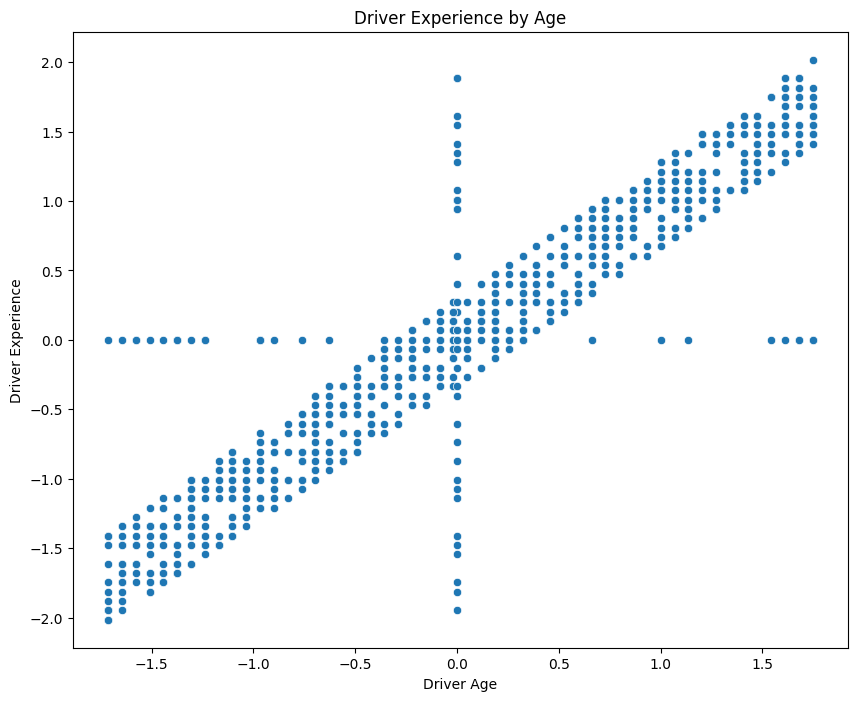

In [90]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Driver_Age" , y="Driver_Experience")
plt.title("Driver Experience by Age")
plt.xlabel("Driver Age")
plt.ylabel("Driver Experience")
plt.show()

C:\Users\96176\AppData\Local\Temp\ipykernel_2012\345426846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=plt_df, x="Weather" , y="Traffic_Density", kind="bar" , palette="Set1")


<Figure size 1000x800 with 0 Axes>

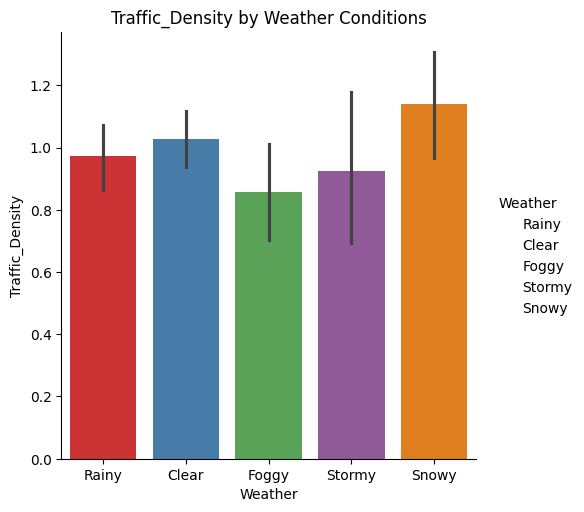

In [91]:
plt.figure(figsize=(10, 8))
sns.catplot(data=plt_df, x="Weather" , y="Traffic_Density", kind="bar" , palette="Set1")
plt.title("Traffic_Density by Weather Conditions")
plt.xlabel("Weather")
plt.ylabel("Traffic_Density")
plt.show()

C:\Users\96176\AppData\Local\Temp\ipykernel_2012\425287720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=plt_df, x="Road_Type" , y="Number_of_Vehicles", kind="violin" , palette="Set1")


<Figure size 1000x800 with 0 Axes>

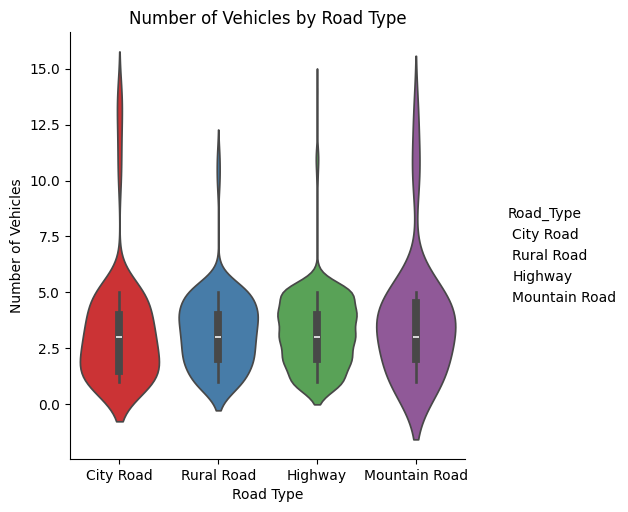

In [92]:
plt.figure(figsize=(10, 8))
sns.catplot(data=plt_df, x="Road_Type" , y="Number_of_Vehicles", kind="violin" , palette="Set1")
plt.title("Number of Vehicles by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Vehicles")
plt.show()

C:\Users\96176\AppData\Local\Temp\ipykernel_2012\1436070670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=plt_df, x="Time_of_Day" , y="Speed_Limit", kind="boxen" , palette="Set1")


<Figure size 1000x800 with 0 Axes>

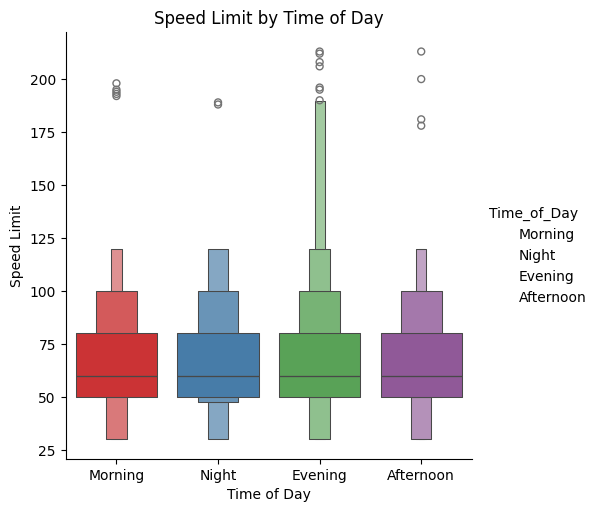

In [93]:
plt.figure(figsize=(10, 8))
sns.catplot(data=plt_df, x="Time_of_Day" , y="Speed_Limit", kind="boxen" , palette="Set1")
plt.title("Speed Limit by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Speed Limit")
plt.show()